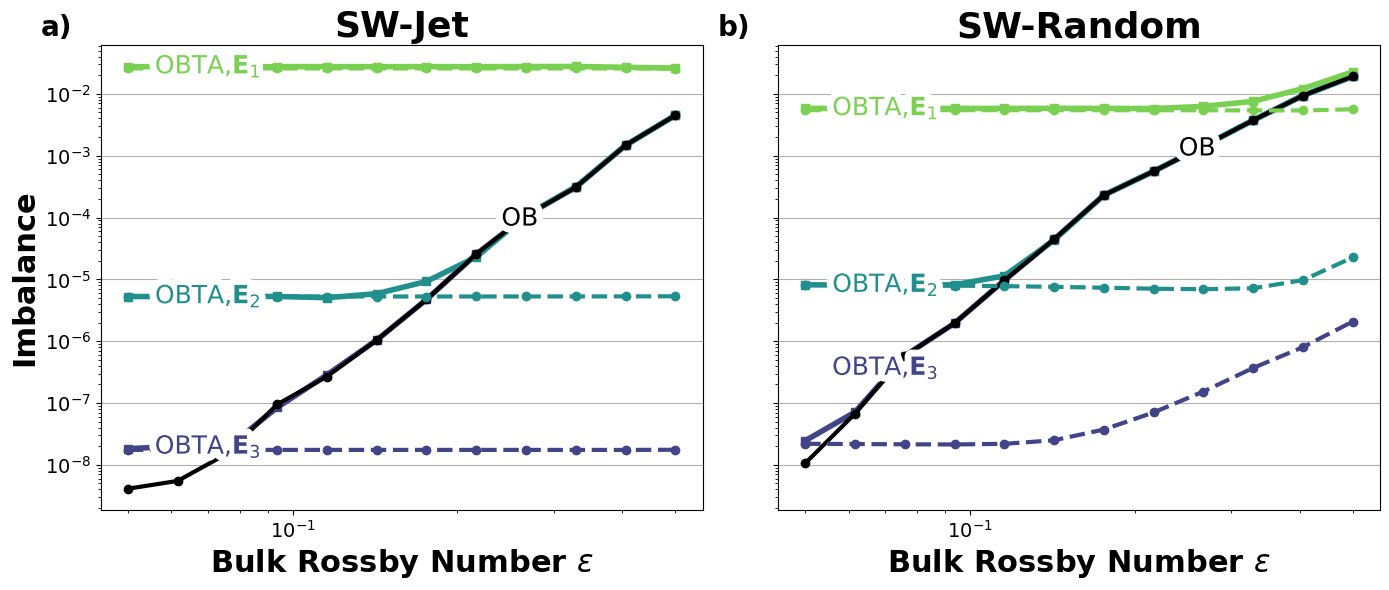

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

ds = xr.load_dataset("../data/rossby_number_sw.nc", decode_timedelta=False)
ds_bal = xr.load_dataset("../data/balancing_error_sw.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(ds.number_chunks)))[::-1]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])
titles = ["SW-Jet", "SW-Random"]


fig, axs = plt.subplots(1, 2, figsize=(14,6), tight_layout=True, sharey=True)

for ax, ic, title in zip(axs, ds.initial_condition, titles):

    # OBTA with base point recalculation
    for n_chunks, color in zip(ds.number_chunks[::-1], colors):
        ds.sel({"initial_condition": ic,
                "number_chunks": n_chunks,
                "balancing_method": "obta"}).imbalance.plot(
                    ax=ax, marker="s", color=color, lw=4, label=f"OBTA,$\\mathbf{{E}}_{int(n_chunks)}$",
                )

    # OB
    ds.sel({"initial_condition": ic,
            "number_chunks":1,
            "balancing_method": "ob"}).imbalance.plot(
                ax=ax, marker="o", color="black", lw=3, label="OB",
            )

    # # Create inline labels
    labelLines(ax.get_lines(), zorder=2.5, align=False,
            fontsize=18, outline_width=10, xvals=[0.07, 0.07, 0.07, 0.26])

    # Balancing error
    for n_chunks, color in zip(ds_bal.number_chunks[::-1], colors):
        ds_bal.sel({"initial_condition": ic,
                    "number_chunks":n_chunks}).balancing_error.plot(
                        ax=ax, marker="o", color=color, lw=3, linestyle="--",
                    )

    ax.tick_params(labelsize=14)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_title(title, fontsize=26, fontweight="bold")
    ax.set_xlabel(r"Bulk Rossby Number $\epsilon$", fontsize=22, fontweight="bold")
    ax.set_ylabel("")

    # Create a, b labels
    ax.text(-0.1, 1.02, next(labels), transform=ax.transAxes,
            fontsize=20, fontweight="bold")

axs[0].set_ylabel("Imbalance", fontsize=22, fontweight="bold")

# rossby_numbers = np.logspace(np.log10(0.13), np.log10(0.5), 5)
# line = axs[0].plot(rossby_numbers, 1e-1*rossby_numbers**7, "k--", label=r"$\epsilon^7$")
# labelLines(line, zorder=2.5, align=True,
#         fontsize=18, outline_width=10, xvals=[0.33])

# rossby_numbers = np.logspace(np.log10(0.06), np.log10(0.18), 5)
# line = axs[1].plot(rossby_numbers, 4e1*rossby_numbers**8, "k--", label=r"$\epsilon^8$")
# labelLines(line, zorder=2.5, align=True,
#         fontsize=18, outline_width=10, xvals=[0.1])

plt.savefig("../figures/rossby_number_sh.png", dpi=200)